In [8]:
# Apredizaje no supervisado, formacion de grupos de datos numericos no etiquetados
# 1) Seleccionamos el numero de clusters (k)
# 2) Seleccionamos al azar K puntos (centroides)
# 3) Medimos la distancia entre cada uno de los puntos y los centroides
# 4) Asignamos a cada punto al centroide que se encuentre mas cerca (cluster)
# 5) Para cada cluster sacamos un nuevo centroide (media de todos los puntos pertenecientes al cluster)
# 6) Volvemos al paso 3 hasta convergencia (ningun punto cambie de cluster)

#### Importamos librerias

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

#### Leemos datos para entrenar el modelo

In [10]:
df = pd.read_csv('Iris_data.txt', sep=',', header=None)
iris_data = df.iloc[:,:-1].to_numpy() 

In [11]:
iris_data[:10] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

#### Implementamos el algoritmo k-means

In [12]:
def k_means(data, n_clusters):
    # 1) Elegimos centroides al azar
    centroids = data[np.random.choice(np.arange(len(data)), n_clusters), :] 

    while True:
        # 2) Les asignamos una etiqueta segun lo cerca que esten de cada centroide
        labels = pairwise_distances_argmin(data, centroids)
        
        # 3) Sacamos los nuevos centroides de la media de los puntos pertenecientes a cada clase
        new_centroids = np.array([data[labels == i].mean(axis=0)
                                for i in range(n_clusters)])
        
        # 4) Comprobamos si hay convergencia
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels

#### Aplicamos el algoritmo K-medias para obtener el modelo y mostramos el grafico

In [13]:
centroids, labels = k_means(iris_data, 2)

#### Mostramos el grafico del modelo

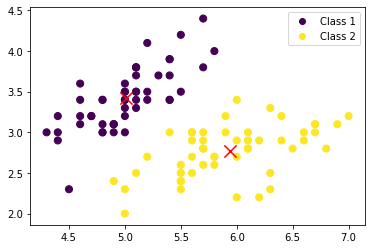

In [14]:
plot = plt.scatter(iris_data[:, 0], iris_data[:, 1], c=labels, s=50, cmap='viridis')
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker = "x", s=150, linewidths = 5, zorder = 10, c='red')
plt.legend(handles=plot.legend_elements()[0], labels= ['Class 1', 'Class 2'])
plt.show()

Como se puede comprobar las muestras se han agrupado en dos clases con sus respectivos centroides marcados con una "X"

#### Centroides del modelo

Los centroides del modelo nos ayudaran a decidir a que clase pertenecen las nuevas muestras, por lo que agrupamos cada centro con su tipo de flor correspondiente, al centroide con eje de coordenadas "X" menor que 5,5 le asignamos el tipo de flor Setosa y al otro Versicolor

In [15]:
clases = {}
if centroids[0][0] < 5.5 :
    clases['Setosa'] = centroids[0]
    clases['Versicolor'] = centroids[1]
else:
    clases['Versicolor'] = centroids[0]
    clases['Setosa'] = centroids[1]
    

In [16]:
clases

{'Setosa': array([5.006, 3.418, 1.464, 0.244]),
 'Versicolor': array([5.936, 2.77 , 4.26 , 1.326])}

#### Leemos los datos del fichero de test

In [17]:
df = pd.read_csv('Iris_test.txt', sep=',', header=None)
iris_test = df.iloc[:,:-1].to_numpy() 
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,5.0,3.4,1.5,0.2,Iris-setosa


#### Creamos funcion de clasificacion

Teniendo en cuenta la distancia a los centroides del modelo, un ejemplo sera de la clase Setosa o de la clase Versicolor

In [18]:
def classifier(example):
    # distancia euclidia de cada ejemplo a cada uno de los centroides
    dist1 = np.linalg.norm(example - clases['Setosa'])
    dist2 = np.linalg.norm(example - clases['Versicolor'])
    if dist1 < dist2:
        return 'Setosa'
    else:
        return 'Versicolor'
    

#### Clasificamos los 3 ejemplos

Las predicciones coinciden con las etiquetas de los datos

In [19]:
print(str(iris_test[:1]) + ' --> ' + classifier(iris_test[:1])) # clasificamos fila 1
print(str(iris_test[1:2]) + ' --> ' + classifier(iris_test[:2])) # clasificamos fila 2
print(str(iris_test[2:3]) + ' --> ' + classifier(iris_test[:3])) # clasificamos fila 3

[[5.1 3.5 1.4 0.2]] --> Setosa
[[6.9 3.1 4.9 1.5]] --> Versicolor
[[5.  3.4 1.5 0.2]] --> Setosa
